# Введение в регрессию

In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') #для красоты

In [11]:
filename = 'D:/Desktop/homework/Аналитический маркетинг/git/data/housing.csv'
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
boston = pd.read_csv(filename, delim_whitespace=True, names=names) 
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Значения столбцов:

- CRIM - доля преступности
- ZN - доля земли для застройки
- INDUS - 
- CHAS - фиктивная переменная (1 - граничит с рекой, 0 - не граничет)
- NOX - концентрация аксидов азота
- RM - среднее кол-во комнат в доме
- AGE - доля живых единиц до 1940
- DIS - взвешанные растояния до 5 центров занятости
- RAD - индекс доступности транспортных магистралей
- TAX - ставка налоги на имущество
- PTRATIO - соотношение количество учеников к учителям 
- B - доля чернокожих
- LSTAT - доля населения низкого статуса

- MEDV - РЕЗУЛЬТАТИЫНОЙ ПРИЗНАК - средняя стоимость домов

In [12]:
X = boston.drop('MEDV', axis=1).values
y = boston['MEDV'].values

Прогноз цены дома по одной характеристике: среднему кол-ву комнат в блоке

In [14]:
X_rooms = X[:,5]

In [15]:
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [16]:
# переводим массивы numpy в желаемую форму, чтобы сохранить первое измерение, но добавить к Х еще одно измерение размера один
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

### График стоимости дома как функция кол-ва комнат

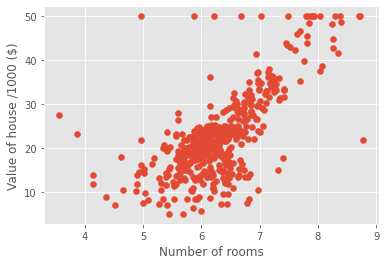

In [17]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show()

Наблюдается прямая зависимость цены дома от количества комнат

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# создаем экземпляр линейной регрессии
reg = LinearRegression()

In [22]:
# применяем регрессию к данным
reg.fit(X_rooms, y)

# проверяем прогнозы регрессии по диапазону данных (linspace между максимальным и минимальным количествам комнат) 
# и получаем прогноз на основе этих данных
predict_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

### Построение этой линии с диаграммой рассеяния

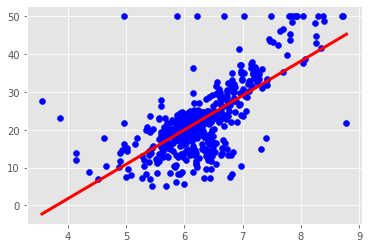

In [24]:
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(predict_space, reg.predict(predict_space), color = 'red', linewidth = 3)
plt.show()

# МНК в регрессии

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# разобьем данные на тестовую и обучающую выборки
X_tran, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# создаем экземпляр регрессора
reg_all = LinearRegression()

# помещаем его в обучающую выборку
reg_all.fit(X_tran, y_train)

# делаем прогноз на тестовой выборке
y_pred = reg_all.predict(X_test)

в классификации можно использовать точность как показатель производительности модели

## R^2

метод оценки по умолчанию для линейной регрессии называется R^2: этот показатель позволяет оценить дисперсию целевой переменной, прогнозируемой на основе переменных характеристик

In [29]:
# Вычислим R^2, применяя оценку метода к модели и передавая ей 2 аргумента: тестовые данные и целевые тестовые данные
r2 = reg_all.score(X_test, y_test)
print('R^2 =', r2)

R^2 = 0.7112260057484955


Но мы хотим использовать регуляризацию, которая накладывает доп ограничения на коэффициенты модели

## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [31]:
# создаем экземпляр модели (в данном случае регрессора)
reg = LinearRegression()

In [33]:
# вызываем оценку CV с помощью регрессора, массива функций и целевой переменной
# cv = 5 означает, что данные поделятся на 5 частей
cv_results = cross_val_score(reg, X, y, cv = 5)

# возвращает массив оценок перекрестной проверки (R^2 по умолчанию), длина = 5 = cv
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [34]:
# вычислим среднее значение R^2
np.mean(cv_results)

0.35327592439588273

# Гребневая регрессия

In [35]:
from sklearn.linear_model import Ridge

In [36]:
# разобьем данные на тестовую и обучающую выборки
X_tran, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# создаем экземпляр регрессора (адаптируемся к обучению)
# normalize - если True, то гарантированно все переменные находятся в одной шкале
ridge = Ridge(alpha = 0.1, normalize = True)

# помещаем его в обучающую выборку
ridge.fit(X_tran, y_train)

# делаем прогноз на тестовой выборке
ridge_pred = ridge.predict(X_test)

# вычислим R^2, применяя оценку метода к модели
ridge.score(X_test, y_test)

0.6996938275127313

 # Регрессия Лассо

In [37]:
from sklearn.linear_model import Lasso

In [38]:
# разобьем данные на тестовую и обучающую выборки
X_tran, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# создаем экземпляр регрессора (адаптируемся к обучению)
# normalize - если True, то гарантированно все переменные находятся в одной шкале
lasso = Lasso(alpha = 0.1, normalize = True)

# помещаем его в обучающую выборку
lasso.fit(X_tran, y_train)

# делаем прогноз на тестовой выборке
lasso_pred = lasso.predict(X_test)

# вычислим R^2, применяя оценку метода к модели
lasso.score(X_test, y_test)

0.5950229535328551

алгоритм LASSO определяет важные и неважные признаки:

In [40]:
# сохраняем имена столбцов 
names = boston.drop('MEDV', axis = 1).columns
names

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [42]:
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X, y).coef_
lasso_coef

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

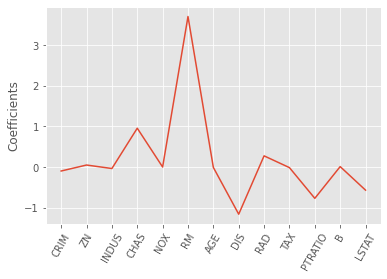

In [44]:
# график коэффициентов как и функции имени дает одно и то же значение
_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coefficients')
plt.show()

исходя из графика понимаем, что главным столбцом является коливество комнат